# Datasets

A dataset is a list of (input, target) pairs that can be further split into training and testing lists.

Let's make an example network to use as demonstration. This network will compute whether the number of 1's in a set of 5 bits is odd.

In [1]:
from conx import Network, Layer

net = Network("Odd Network")
net.add(Layer("input", 5))
net.add(Layer("hidden", 10, activation="relu"))
net.add(Layer("output", 1, activation="sigmoid"))
net.connect()
net.compile(error="mse", optimizer="adam")
net.summary()

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Network Summary
---------------
Network name: Odd Network
    Layer name: 'input' (input)
        VShape: None
        Dropout: 0
        Connected to: ['hidden']
        Activation function: None
        Dropout percent: 0
    Layer name: 'hidden' (hidden)
        VShape: None
        Dropout: 0
        Connected to: ['output']
        Activation function: relu
        Dropout percent: 0
    Layer name: 'output' (output)
        VShape: None
        Dropout: 0
        Activation function: sigmoid
        Dropout percent: 0


conx, version 3.5.7


## As a list of (input, target) pairs

The most straightforward method of adding input, target vectors to train on is to use a list of (input, target) pairs. First we define a function that takes a number and returns the bitwise representation of it:

In [2]:
def num2bin(i, bits=5):
    """
    Take a number and turn it into a list of bits (most significant first).
    """
    return [int(s) for s in (("0" * bits) + bin(i)[2:])[-bits:]]

In [3]:
num2bin(23)

[1, 0, 1, 1, 1]

Now we make a list of (input, target) pairs:

In [4]:
patterns = []

for i in range(2 ** 5):
    inputs = num2bin(i)
    targets = [int(sum(inputs) % 2 == 1.0)]
    patterns.append((inputs, targets))

Pair set 5 looks like:

In [5]:
patterns[5]

([0, 0, 1, 0, 1], [0])

We set the network to use this dataset:

In [6]:
patterns

[([0, 0, 0, 0, 0], [0]),
 ([0, 0, 0, 0, 1], [1]),
 ([0, 0, 0, 1, 0], [1]),
 ([0, 0, 0, 1, 1], [0]),
 ([0, 0, 1, 0, 0], [1]),
 ([0, 0, 1, 0, 1], [0]),
 ([0, 0, 1, 1, 0], [0]),
 ([0, 0, 1, 1, 1], [1]),
 ([0, 1, 0, 0, 0], [1]),
 ([0, 1, 0, 0, 1], [0]),
 ([0, 1, 0, 1, 0], [0]),
 ([0, 1, 0, 1, 1], [1]),
 ([0, 1, 1, 0, 0], [0]),
 ([0, 1, 1, 0, 1], [1]),
 ([0, 1, 1, 1, 0], [1]),
 ([0, 1, 1, 1, 1], [0]),
 ([1, 0, 0, 0, 0], [1]),
 ([1, 0, 0, 0, 1], [0]),
 ([1, 0, 0, 1, 0], [0]),
 ([1, 0, 0, 1, 1], [1]),
 ([1, 0, 1, 0, 0], [0]),
 ([1, 0, 1, 0, 1], [1]),
 ([1, 0, 1, 1, 0], [1]),
 ([1, 0, 1, 1, 1], [0]),
 ([1, 1, 0, 0, 0], [0]),
 ([1, 1, 0, 0, 1], [1]),
 ([1, 1, 0, 1, 0], [1]),
 ([1, 1, 0, 1, 1], [0]),
 ([1, 1, 1, 0, 0], [1]),
 ([1, 1, 1, 0, 1], [0]),
 ([1, 1, 1, 1, 0], [0]),
 ([1, 1, 1, 1, 1], [1])]

In [7]:
net.dataset.load(patterns)

In [9]:
net.dataset.summary()

**Dataset Split**:
   * training  : 32
   * testing   : 0
   * total     : 32

**Input Summary**:
   * shape  : [(5,)]
   * range  : [(0.0, 1.0)]

**Target Summary**:
   * shape  : [(1,)]
   * range  : [(0.0, 1.0)]



## Dataset.add()

You can use the default `dataset` and add one pattern at a time. Consider the task of training a network to determine if the number of inputs is even (0) or odd (1). We could add inputs one at a time:

In [10]:
net.dataset.clear()

In [11]:
net.dataset.add([0, 0, 0, 0, 1], [1])
net.dataset.add([0, 0, 0, 1, 1], [0])
net.dataset.add([0, 0, 1, 0, 0], [1])

In [12]:
net.dataset.clear()

In [13]:
for i in range(2 ** 5):
    inputs = num2bin(i)
    targets = [int(sum(inputs) % 2 == 1.0)]
    net.dataset.add(inputs, targets)

In [14]:
net.dataset.summary()

**Dataset Split**:
   * training  : 32
   * testing   : 0
   * total     : 32

**Input Summary**:
   * shape  : [(5,)]
   * range  : [(0.0, 1.0)]

**Target Summary**:
   * shape  : [(1,)]
   * range  : [(0.0, 1.0)]



In [15]:
net.dataset.inputs[13]

[0.0, 1.0, 1.0, 0.0, 1.0]

In [16]:
net.dataset.targets[13]

[1.0]

In [17]:
net.reset()

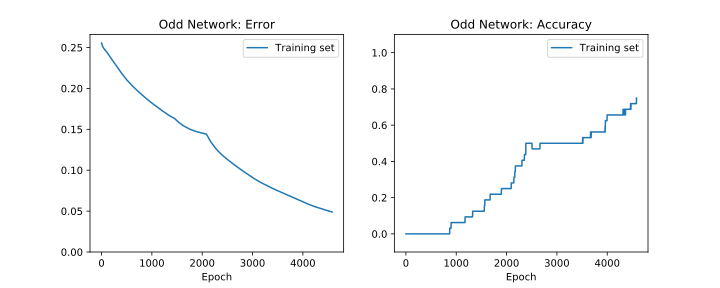

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 4581 |   0.04895 |   0.75000 


In [17]:
net.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

In [19]:
net.test(tolerance=.2, show=True)

Testing validation dataset with tolerance 0.2...
# | inputs | targets | outputs | result
---------------------------------------
0 | [[0.00,0.00,0.00,0.00,0.00]] | [[0.00]] | [0.50] | X
1 | [[0.00,0.00,0.00,0.00,1.00]] | [[1.00]] | [0.55] | X
2 | [[0.00,0.00,0.00,1.00,0.00]] | [[1.00]] | [0.49] | X
3 | [[0.00,0.00,0.00,1.00,1.00]] | [[0.00]] | [0.55] | X
4 | [[0.00,0.00,1.00,0.00,0.00]] | [[1.00]] | [0.39] | X
5 | [[0.00,0.00,1.00,0.00,1.00]] | [[0.00]] | [0.51] | X
6 | [[0.00,0.00,1.00,1.00,0.00]] | [[0.00]] | [0.40] | X
7 | [[0.00,0.00,1.00,1.00,1.00]] | [[1.00]] | [0.50] | X
8 | [[0.00,1.00,0.00,0.00,0.00]] | [[1.00]] | [0.46] | X
9 | [[0.00,1.00,0.00,0.00,1.00]] | [[0.00]] | [0.50] | X
10 | [[0.00,1.00,0.00,1.00,0.00]] | [[0.00]] | [0.51] | X
11 | [[0.00,1.00,0.00,1.00,1.00]] | [[1.00]] | [0.54] | X
12 | [[0.00,1.00,1.00,0.00,0.00]] | [[0.00]] | [0.40] | X
13 | [[0.00,1.00,1.00,0.00,1.00]] | [[1.00]] | [0.47] | X
14 | [[0.00,1.00,1.00,1.00,0.00]] | [[1.00]] | [0.42] | X
15 | [[0.00

## Dataset inputs and targets

Inputs and targets in the dataset are represented in the same format as given (as lists, or lists of lists). These formats are automattically converted into an internal format.

In [20]:
ds = net.dataset

In [21]:
ds.inputs[17]

[1.0, 0.0, 0.0, 0.0, 1.0]

To see/access the internal format, use the underscore before inputs or targets. This is a numpy array. conx is designed so that you need not have to use numpy for most network operations.

In [22]:
ds._inputs[0][17]

array([ 1.,  0.,  0.,  0.,  1.], dtype=float32)

## Built-in datasets

In [2]:
from conx import Dataset

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
conx, version 3.5.7


In [2]:
ds = Dataset.get('mnist')
ds

**Dataset Split**:
   * training  : 70000
   * testing   : 0
   * total     : 70000

**Input Summary**:
   * shape  : [(28, 28, 1)]
   * range  : [(0.0, 1.0)]

**Target Summary**:
   * shape  : [(10,)]
   * range  : [(0.0, 1.0)]



In [3]:
ds = Dataset.get('cifar10')
ds

**Dataset name: CIFAR-10**

Original source: https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10
classes, with 6000 images per class. 

The classes are completely mutually exclusive. There is no overlap
between automobiles and trucks. "Automobile" includes sedans, SUVs,
things of that sort. "Truck" includes only big trucks. Neither
includes pickup trucks.

**Dataset Split**:
   * training  : 60000
   * testing   : 0
   * total     : 60000

**Input Summary**:
   * shape  : [(32, 32, 3)]
   * range  : [(0.0, 1.0)]

**Target Summary**:
   * shape  : [(10,)]
   * range  : [(0.0, 1.0)]



In [3]:
ds = Dataset.get("gridfonts")
ds

**Dataset name: Gridfonts**


**Dataset Split**:
   * training  : 7462
   * testing   : 0
   * total     : 7462

**Input Summary**:
   * shape  : [(25, 9)]
   * range  : [(0.0, 1.0)]

**Target Summary**:
   * shape  : [(25, 9)]
   * range  : [(0.0, 1.0)]



In [4]:
ds = Dataset.get('cifar100')
ds

**Dataset name: CIFAR-100**

Original source: https://www.cs.toronto.edu/~kriz/cifar.html

This dataset is just like the CIFAR-10, except it has 100 classes
containing 600 images each. The 100 classes in the CIFAR-100 are grouped
into 20 superclasses. Each image comes with a "fine" label (the class
to which it belongs) and a "coarse" label (the superclass to which it
belongs).  Here is the list of classes in the CIFAR-100:

Superclass                     | Classes
-------------------------------|-----------------------------------------------------
aquatic mammals	               | beaver, dolphin, otter, seal, whale
fish                           | aquarium fish, flatfish, ray, shark, trout
flowers	                       | orchids, poppies, roses, sunflowers, tulips
food containers                | bottles, bowls, cans, cups, plates
fruit and vegetables           | apples, mushrooms, oranges, pears, sweet peppers
household electrical devices   | clock, computer keyboard, lamp, telephone, television
household furniture            | bed, chair, couch, table, wardrobe
insects	                       | bee, beetle, butterfly, caterpillar, cockroach
large carnivores               | bear, leopard, lion, tiger, wolf
large man-made outdoor things  | bridge, castle, house, road, skyscraper
large natural outdoor scenes   | cloud, forest, mountain, plain, sea
large omnivores and herbivores | camel, cattle, chimpanzee, elephant, kangaroo
medium-sized mammals           | fox, porcupine, possum, raccoon, skunk
non-insect invertebrates       | crab, lobster, snail, spider, worm
people	                       | baby, boy, girl, man, woman
reptiles                       | crocodile, dinosaur, lizard, snake, turtle
small mammals                  | hamster, mouse, rabbit, shrew, squirrel
trees                          | maple, oak, palm, pine, willow
vehicles 1                     | bicycle, bus, motorcycle, pickup truck, train
vehicles 2                     | lawn-mower, rocket, streetcar, tank, tractor


**Dataset Split**:
   * training  : 60000
   * testing   : 0
   * total     : 60000

**Input Summary**:
   * shape  : [(32, 32, 3)]
   * range  : [(0.0, 1.0)]

**Target Summary**:
   * shape  : [(100,)]
   * range  : [(0.0, 1.0)]



## Dataset operations

Dataset.split() will divide the dataset between training and testing sets. You can provide split an integer (to divide at a specific point), or a floating-point value, to divide by a percentage.

In [28]:
ds.split(20)

In [29]:
ds.split(.5)

In [30]:
ds.slice(10)

In [31]:
ds.shuffle()

In [32]:
ds.chop(5)

In [33]:
ds.summary()

**Dataset Split**:
   * training  : 3
   * testing   : 2
   * total     : 5

**Input Summary**:
   * shape  : [(32, 32, 3)]
   * range  : [(0.0, 1.0)]

**Target Summary**:
   * shape  : [(100,)]
   * range  : [(0.0, 1.0)]



### Additional operations

These functions are subject to change to an API which is more general:

In [34]:
ds.set_targets_from_inputs()

In [35]:
ds.set_inputs_from_targets()

In [36]:
# ds.set_targets_from_labels()

In [37]:
ds.inputs.shape

[(32, 32, 3)]

In [39]:
ds.inputs.reshape(0, (32 * 32 * 3,))

In [40]:
ds.inputs.shape

[(3072,)]

## Dataset direct manipulation

You can also set the internal format directly, given that it is in the correct format:

* use list of columns for multi-bank inputs or targets
* use np.array(vectors) for single-bank inputs or targets

In [41]:
import numpy as np

inputs = []
targets = []

for i in range(2 ** 5):
    v = num2bin(i)
    inputs.append(v)
    targets.append([int(sum(v) % 2 == 1.0)])

net = Network("Even?", 5, 2, 2, 1)
net.compile(error="mse", optimizer="adam")
net.dataset.load_direct([np.array(inputs)], [np.array(targets)])

In [42]:
net.test(tolerance=.2)

Testing validation dataset with tolerance 0.2...
Total count: 32
      correct: 1
      incorrect: 31
Total percentage correct: 0.03125
